# Análisis y Visualización de Datos
## Trabajo práctico entregable - Grupo 30: Di Bartolo, Madriaga y Tula
---

### Índice de contenido:
* [Librerías externas](#Libs)
* [Lectura del dataset](#Dataset)
* [Ejercicio 4](#Ejercicio4)
    * [Formalización](#1)
    * [P-valor](#2)
    * [Potencia del test](#3)

#### Librerías externas <a class="anchor" id="Libs"></a>
---

Empezamos cargando librerías que vamos a usar en la resolución del ejercicio.

In [2]:
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
import seaborn
import math
import numpy as np

#### Lectura del dataset <a class="anchor" id="Dataset"></a>
---

Cargamos el dataset original y eliminamos los valores extremos (el 5% que menos y más tenga de salario neto).

In [3]:
# Url donde está alojado el dataset.
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'

# Lectura del dataset.
df = pd.read_csv(url)

# Limpiando valores extremos.
df = df[df["salary_monthly_NETO"] > df["salary_monthly_NETO"].quantile(5/100)]
df = df[df["salary_monthly_NETO"] < df["salary_monthly_NETO"].quantile(95/100)]

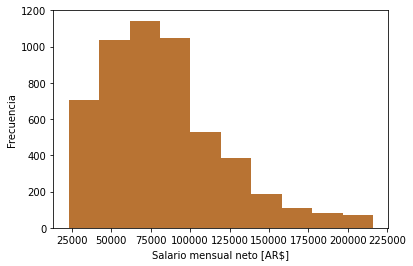

In [4]:
# Graficando.
plt.hist(df["salary_monthly_NETO"],10,color="#B87333")
plt.xlabel("Salario mensual neto [AR$]")
plt.ylabel("Frecuencia")
plt.show()

In [5]:
# Grupo de salarios netos de hombres.
groupA = df[df["profile_gender"] == "Hombre"].salary_monthly_NETO

# Grupo de salarios netos de no-hombres.
groupB = df[df["profile_gender"] != "Hombre"].salary_monthly_NETO 

In [8]:
print("La media del grupo A es:", round(groupA.mean(),2), "y su desviación estándar",round(groupA.std(),2))
print("La media del grupo B es:", round(groupB.mean(),2), "y su desviación estándar",round(groupB.std(),2))

La media del grupo A es: 84482.96 y su desviación estándar 38027.59
La media del grupo B es: 74325.94 y su desviación estándar 33936.42


### Ejercicio 4 - Test de hipótesis <a class="anchor" id="Ejercicio4"></a>
---

#### 4.1 Formalización <a class="anchor" id="1"></a>

Describir formalmente los distintos compenentes de un test de hipótesis para comprobar si la distribución de los salarios es distinta entre los grupos A y B.

**Hipótesis**

La hipótesis nula ($H_0$) afirma que la media de los salarios netos de los hombres es igual a la media del salario de los no-hombres.

$$
H_0: \ \ <SalarioNeto>_{Hombres} \ \ -  \ \ <SalarioNeto>_{No-Hombres} \ \  = \ \  0
$$

La hipótesis alternativa ($H_1$), por el contrario, nos dice que el salario neto medio de los hombres es distinto al de los no hombres.

$$
H_1: \ \ <SalarioNeto>_{Hombres} \ \ -  \ \ <SalarioNeto>_{No-Hombres} \ \  \neq \ \  0
$$

**Estadístico (Pivote)**

Estadístico: 
$$\overline{SalarioNeto}_{Hombres} \ \ -  \ \ \overline{SalarioNeto}_{No-Hombres}$$

$$\$$

Bajo $H_0$: 
$$ \frac{(<SalarioNeto>_{Hombres} \ \ -  \ \ <SalarioNeto>_{No-Hombres}) - (\overline{SalarioNeto}_{Hombres} \ \ -  \ \ \overline{SalarioNeto}_{No-Hombres})}{\sqrt{\frac{\sigma_{Hombres}^2}{N_{Hombres}}+\frac{\sigma_{No-Hombres}^2}{N_{No-Hombres}}}} \approx N(0,1)
$$

$$\$$

Ya que nuestro caso es una diferencia de medias de dos muestras independientes y de varianzas desiguales.

$$\$$

Por lo tanto, un intervalo de confianza de nivel $(1 - \alpha) \ $ para $\ \ \overline{SalarioNeto}_{Hombres} \ \ -  \ \ \overline{SalarioNeto}_{No-Hombres}\ \ $ está dado por:

$$\$$

$$
<SalarioNeto>_{Hombres} \ \ -  \ \ <SalarioNeto>_{No-Hombres} \ \ \pm \ \ z_{\frac{\alpha}{2}} \sqrt{\frac{\sigma_{Hombres}^2}{N_{Hombres}}+\frac{\sigma_{No-Hombres}^2}{N_{No-Hombres}}}
$$

$$\$$

**Nivel de significancia del test $\alpha$**

$$ \alpha = 5\% $$

Como vamos a usar $z$, definamos los z valores límites para nuestro $\alpha$:

- $z_{0.025} = -1.96$ 
- $z_{0.975} = 1.96$

Todo $z$ valor que sea menor a $-1.96$ o mayor a $1.96$ cae en la zona de rechazo.


#### 4.2 P-valor <a class="anchor" id="2"></a>

1. Calcule el p-valor y decida si rechazar o no la hipótesis nula.
2. Interprete el resultado.
3. Los dos grupos de nuestra muestra tienen tamaños muy distintos. ¿Esto afecta al tests?

Links útiles:
* [Test de hipótesis usando scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
* [Test de Welch](http://daniellakens.blogspot.com/2015/01/always-use-welchs-t-test-instead-of.html)

Siguiendo la metodología del inciso **4.1** vamos a calcular el intervalo donde puede caer la resta de las medias de los salarios netos para que se cumpla la hipótesis nula.

In [11]:
# N de los grupos.
N_A = len(groupA)
N_B = len(groupB)

# Desviación estándar de los grupos.
std_A = groupA.std()
std_B = groupB.std()

# Valores z.
z_0025 = -1.96
z_0975 = 1.96

# Límite inferior.
lim_inf = z_0025 * ((std_A**2 / N_A) + (std_B**2 / N_B))**0.5
lim_sup = z_0975 * ((std_A**2 / N_A) + (std_B**2 / N_B))**0.5

print("Si la diferencia de promedios de salarios está entre $",round(lim_inf,2),"y $",round(lim_sup,2),"entonces"\
     ,"no podemos rechazar la hipótesis nula y deberemos aceptar que las medias de los salarios son iguales con"\
     ,"un 95% de confianza.\n")
print("Si ocurre lo contrario, deberemos rechazar la hipótesis nula con un 95% de confianza.")b


Si la diferencia de promedios de salarios está entre $ -2534.81 y $ 2534.81 entonces no podemos rechazar la hipótesis nula y deberemos aceptar que las medias de los salarios son iguales con un 95% de confianza.

Si ocurre lo contrario, deberemos rechazar la hipótesis nula con un 95% de confianza.


Veamos entonces cuánto es la diferencia de los promedios.

In [14]:
print("La diferencia de los promedios de los sueldos netos de los hombres y los no-hombres es de: $"\
      , round(groupA.mean()-groupB.mean(),2))

print("\nDebemos rechazar la hipótesis nula.")
print("\nLos promedios de los sueldos netos de los hombres y no hombres NO son iguales.")

La diferencia de los promedios de los sueldos netos de los hombres y los no-hombres es de: $ 10157.02

Debemos rechazar la hipótesis nula.

Los promedios de los sueldos netos de los hombres y no hombres NO son iguales.
